In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ALLCools.plot import *

In [2]:
from matplotlib import rc

labelsize = 6
linewidth = 0.6
rc('lines', linewidth=linewidth)
rc('axes', labelsize=labelsize, linewidth=linewidth)
rc('xtick', labelsize=labelsize)
rc('ytick', labelsize=labelsize)
rc('xtick.major', width=linewidth)
rc('ytick.major', width=linewidth)
rc('xtick.minor', width=linewidth-0.2)
rc('ytick.minor', width=linewidth-0.2)
rc('patch', linewidth=linewidth)

## Plot Data

In [3]:
cell_tidy_data = pd.read_msgpack(
    '/home/hanliu/project/mouse_rostral_brain/study/ClusteringSummary/Summary/TotalClusteringResults.msg'
)

/home/hanliu/miniconda3/envs/clustering/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The read_msgpack is deprecated and will be removed in a future version.
It is recommended to use pyarrow for on-the-wire transmission of pandas objects.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
region_palette = pd.read_csv('/home/hanliu/project/mouse_rostral_brain/metadata/palette/dissection_region.palette.csv',
                                header=None, index_col=0, squeeze=True).to_dict()
sub_region_palette = pd.read_csv('/home/hanliu/project/mouse_rostral_brain/metadata/palette/sub_region.palette.csv',
                                header=None, index_col=0, squeeze=True).to_dict()
major_region_palette = pd.read_csv('/home/hanliu/project/mouse_rostral_brain/metadata/palette/major_region.palette.csv',
                                header=None, index_col=0, squeeze=True).to_dict()

cell_class_palette = pd.read_csv('/home/hanliu/project/mouse_rostral_brain/metadata/palette/cell_class.palette.csv',
                                header=None, index_col=0, squeeze=True).to_dict()
major_type_palette = pd.read_csv('/home/hanliu/project/mouse_rostral_brain/metadata/palette/major_type.palette.csv',
                                header=None, index_col=0, squeeze=True).to_dict()
sub_type_palette = pd.read_csv('/home/hanliu/project/mouse_rostral_brain/metadata/palette/sub_type.palette.csv',
                                header=None, index_col=0, squeeze=True).to_dict()

for sub_type in cell_tidy_data['SubType'].unique():
    if sub_type not in sub_type_palette:
        # outlier and NA color
        sub_type_palette[sub_type] = '#D3D3D3'

In [5]:
cell_tidy_data['MajorType'].unique()

array(['MGE-Sst', 'CA3', 'CA1', 'CA3-St18', 'Unc5c', 'Gfra1', 'ODC', 'PC',
       'ANP', 'IT-L5', 'NP-L6', 'CGE-Lamp5', 'CT-L6', 'IG-CA2', 'DG-po',
       'DG', 'CGE-Vip', 'OPC', 'ASC', 'MGC', 'PAL-Inh', 'PT-L5',
       'MGE-Pvalb', 'VLMC', 'EC', 'VLMC-Pia', 'OLF', 'MSN-D2', 'L6b',
       'IT-L6', 'IT-L23', 'IT-L4', 'OLF-Exc', 'CLA', 'Foxp2', 'MSN-D1',
       'LSX-Inh', 'D1L-Fstl4', 'EP', 'D1L-PAL', 'Chd7'], dtype=object)

In [6]:
cell_tidy_data = cell_tidy_data[cell_tidy_data['MajorType'] == 'DG'].copy()

In [10]:
cell_tidy_data.columns

Index(['AllcPath', 'CCC_Rate', 'CG_Rate', 'CG_RateAdj', 'CH_Rate',
       'CH_RateAdj', 'FinalReads', 'InputReads', 'MappedReads', 'Region',
       'index_name', 'uid', 'BamFilteringRate', 'MappingRate', 'Pos96',
       'Plate', 'Col96', 'Row96', 'Col384', 'Row384', 'FACS_Date', 'Slice',
       'CellClass', 'l1-umap_0', 'l1-umap_1', 'l1-tsne_0', 'l1-tsne_1',
       'MajorType', 'l2-umap_0', 'l2-umap_1', 'l2-tsne_0', 'l2-tsne_1',
       'SubType', 'l3-umap_0', 'l3-umap_1', 'l3-tsne_0', 'l3-tsne_1',
       'L1CellClass', 'class_tsne_0', 'class_tsne_1', 'class_umap_0',
       'class_umap_1', 'Order', 'RegionName', 'MajorRegion', 'SubRegion',
       'DetailRegion', 'PotentialOverlap (MMB)', 'Anterior (CCF coords)',
       'Posterior (CCF coords)', 'MajorRegionColor', 'SubRegionColor',
       'DissectionRegionColor', 'Replicate'],
      dtype='object')

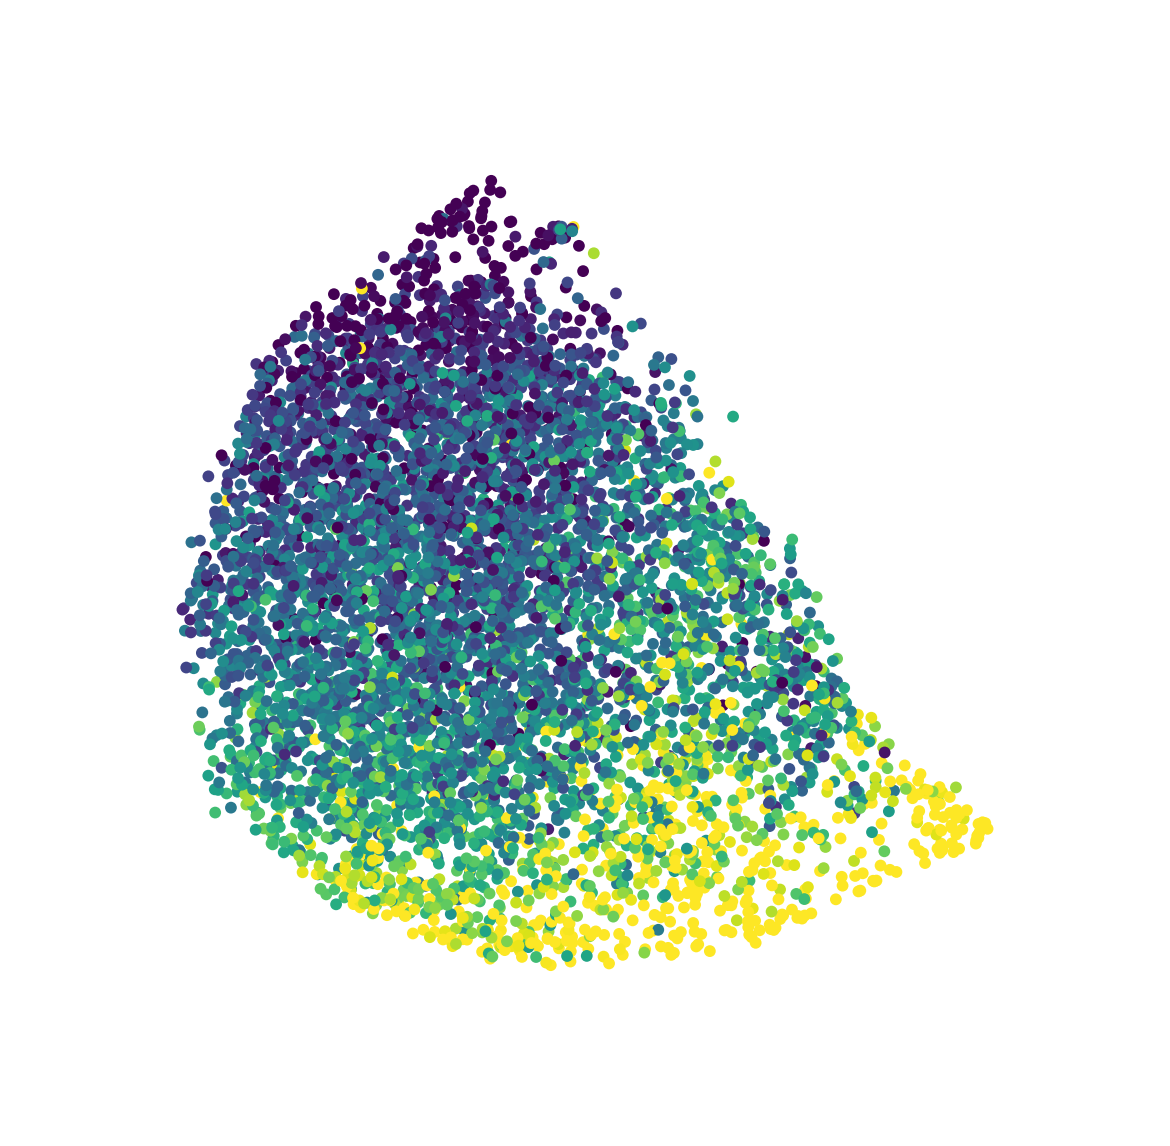

In [43]:
fig, ax = plt.subplots(figsize=(1, 1), dpi=1200)

continuous_scatter(ax=ax,
                    data=cell_tidy_data.sample(cell_tidy_data.shape[0]),
                    coord_base='l2-umap',
                    hue='CH_Rate',
                    hue_norm=(0.008, 0.012),
                    s=0.5,
                    max_points=None,
                    axis_format=None,
                   colorbar=False,
                    #text_anno='MajorType', 
                    #text_anno_kws=dict(fontsize=2)
                   )
fig.savefig(f'DG-UMAP_color_by_mCH.scatter_part.png')
pass

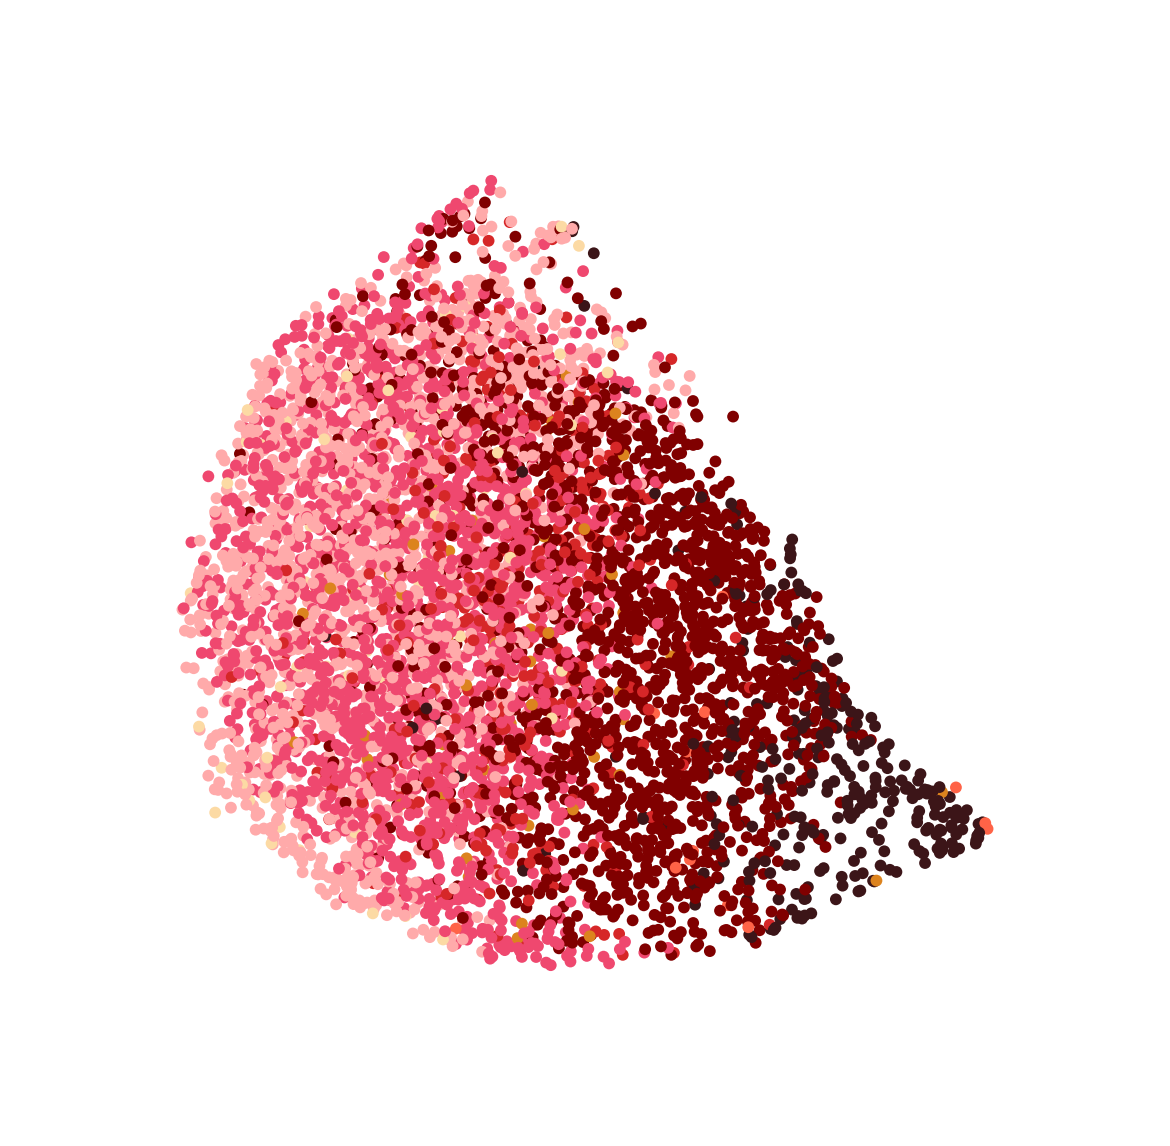

In [28]:
fig, ax = plt.subplots(figsize=(1, 1), dpi=1200)

categorical_scatter(ax=ax,
                    data=cell_tidy_data.sample(cell_tidy_data.shape[0]),
                    coord_base='l2-umap',
                    hue='Region',
                    palette=region_palette,
                    s=0.5,
                    max_points=None,
                    axis_format=None,
                    #text_anno='MajorType', 
                    #text_anno_kws=dict(fontsize=2)
                   )
fig.savefig(f'DG-UMAP_color_by_region.scatter_part.png')


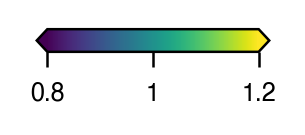

In [55]:
hue_norm = (0, 1)

from matplotlib.cm import get_cmap
from matplotlib.colors import ListedColormap, Normalize
from matplotlib.colorbar import ColorbarBase


fig, cax = plt.subplots(figsize=(1, 0.1), dpi=300)
orientation = 'horizontal'
cmap = get_cmap('viridis')

cnorm = Normalize(vmin=hue_norm[0],
                      vmax=hue_norm[1])

colorbar = ColorbarBase(cax,
                        cmap=cmap,
                        norm=cnorm,
                        orientation=orientation,
                        extend='both')
colorbar.outline.set_linewidth(linewidth)
colorbar.set_ticks([0, 0.5, 1])
colorbar.set_ticklabels(['0.8', '1', '1.2'])

colorbar.outline.set_linewidth(linewidth)
fig.savefig('color_bar.pdf')